The aim of this Notebook is to help you understand better what SVD is doing. This is in addition to the class slides.

I will start with simple Geometric example that will help visualise the learned model, switch to quick review of the HW assignment and show how those things can be applied there and finish with an example of real-life application use in recommender systems 

In [2]:
# Import all required libraries
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Importing SVD
from scipy.linalg import svd

np.random.seed(0)
%matplotlib inline

## Geomtric Example

The idea of SVD is based on geometric properties. If you don't remember much from linear algebra let's try and refresh your memory with a simple 2-dimensional data. 

What SVD is doing is finding principle components that are orthogonal basis functions. This means that in this 2d example we are going to find two vectors that can represent any point as a linear combination of those points.

The two basis-functions (also knosn as directions) that SVD will find will be the ones that will minimize that will preserve the data relation the most in the embedded space (we'll get to that in few code blocks).

Let's look at the following example.


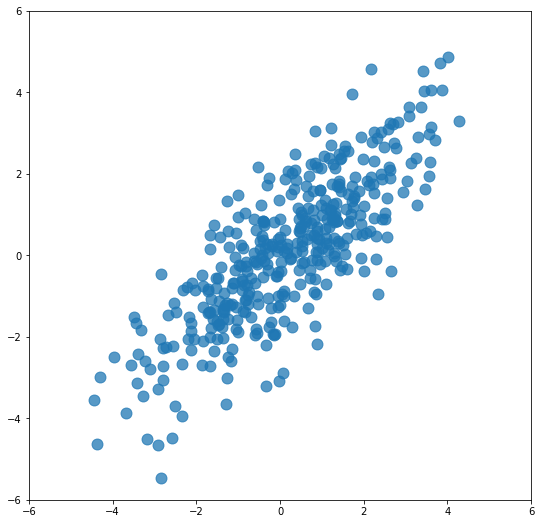

In [3]:
# Sampling a 400 points from a 2-dimensional gaussian distribution with an eliptic slented shape.
ps = np.random.multivariate_normal([0, 0], [[3, 2.5], [2.5, 3.2]], size=400)

f, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.scatter(ps[:, 0], ps[:, 1], s=120, alpha=.75)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.show()


Here in this exampel we have 400 points in the plane. The idea of representing the points in an embedded space (also known as latent-space) is not new to you. This is the same whing that K-Means clustering is doing. In that K-Means each centroid (or cluster) is a dimension in that space and the points are now represented by the centroids.

The difference is that SVD finds "directions" instead of spatial clusters. So let's run SVD and see what it finds.

### Running SVD
The process for running SVD is almost exactly the same every time:

1. Remove the mean from the data (to scale it).
2. Find the U, s, V using the SVD algorithm with the parameter full_matrices set to False.
3. Combine U and s into W.

In [4]:
# Step 1
mu = np.mean(ps, axis=0)
X0 = ps - mu

# Step 2
U, s, V = svd(X0, full_matrices=False)

# Step 3
W = np.dot(U, np.diag(s))

print 'Shape of W = (%d, %d)' % W.shape, 'Shape of V = (%d, %d)' % V.shape

Shape of W = (400, 2) Shape of V = (2, 2)


### Interpretation of V
The learned V matrix is the directions that the SVD finds (or the principle components). It represents for us the new latent-space in which each row is a unique direction.

In the HW assignment you are required to plot the directions for the Faces data sets, and there's a code that shows you how to do that. Using that code on the 2-D example results in the following plot.

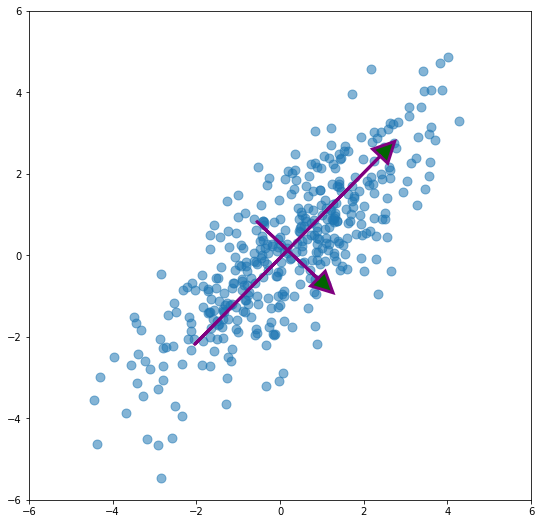

In [5]:
f, ax = plt.subplots(1, 1, figsize=(9, 9))

ax.scatter(ps[:, 0], ps[:, 1], s=80, alpha=.55)

for j in range(2):
    a = 2 * np.median(np.abs(W[:, j]))  # The scalar

    # Compting the "direction" as a function of the mean.
    p1 = mu - a * V[j]
    p2 = mu + a * V[j]
    
    dx, dy = p2 - p1
    ax.arrow(p1[0], p1[1], dx, dy, head_width=0.5, head_length=0.5, lw=3, 
             ec='purple', fc='darkgreen')

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.show()

We can see that running SVD gave us two orthogonal lines (basis functions),  each one of them is a "direction".

## Understanding W
Each row in V is a basis function, and each point can be represented as a linear combination of those basis function. The scalar used in that linear combination are in W.

If we take the first point (0 index) in X table as an example, it can be represented as a dot product of the first row in W and the first column in V:

$$X_0 = W_{00} V_{00} + W_{01} V_{10}$$

That means that we can get all the points back by simply doing the dot product of W and V (DO NOT FORGET TO ADD THE MU BACK -- SEE NOTES IN CODE).

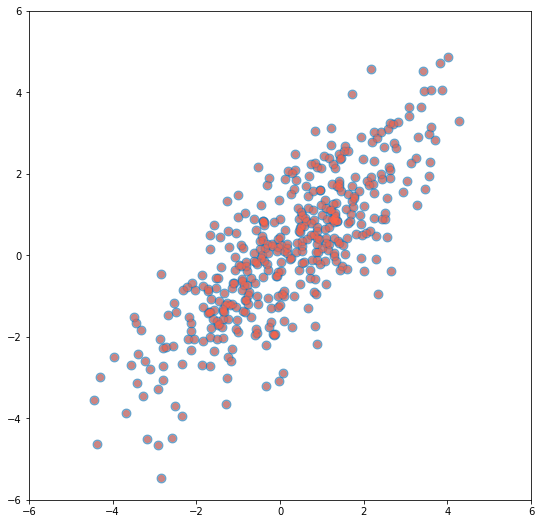

In [6]:
f, ax = plt.subplots(1, 1, figsize=(9, 9))

ax.scatter(ps[:, 0], ps[:, 1], s=80, alpha=.55)

# Reconstruction of the data from the latent-space representation
Xhat = np.dot(W, V) + mu # DO NOT FORGET TO ADD BACK THE MU

# Plotting the reconstructed points on top of the blue dots.
ax.scatter(Xhat[:, 0], Xhat[:, 1], s=35, alpha=.55, color='tomato')

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.show()

The plot shows the reconstructed data (red dots)  overlayed on top of the original data (blue dots), showing that each point can be represented as a linear combination of the basis function.

That'll be pretty much it for the linear algebra cover :)

## Understanding the Embedded Space
The basis function represent the new embedded space. That means that in that all the points also have a representation in that space. So far we looked at the representation in the full space, which resulted in a perfect reconstruction of the data. But what if we look at a smaller embedded space.

To do that, let's look at a more complex example using 2 clusters.

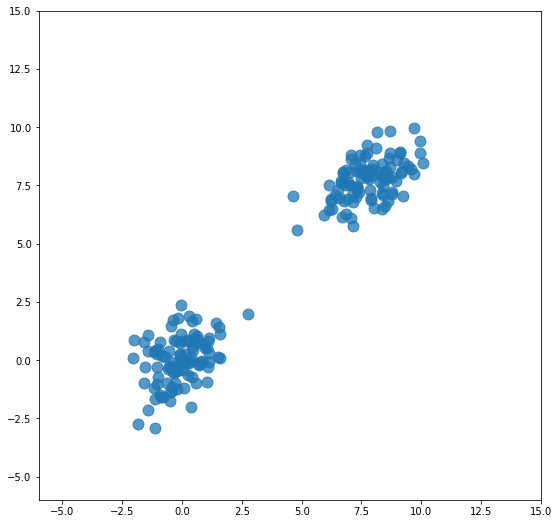

In [7]:
ps1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1.2]], size=100)
ps2 = np.random.multivariate_normal([8, 8], [[1.2, 0.5], [0.5, 1]], size=100)

ps = np.vstack([ps1, ps2])

f, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.scatter(ps[:, 0], ps[:, 1], s=120, alpha=.75)

ax.set_xlim(-6, 15)
ax.set_ylim(-6, 15)

plt.show()

Let's run the SVD algorithm again (using the SAME process).

In [8]:
# Step 1
mu = np.mean(ps, axis=0)
X0 = ps - mu

# Step 2
U, s, V = svd(X0, full_matrices=False)

# Step 3
W = np.dot(U, np.diag(s))

print 'Shape of W = (%d, %d)' % W.shape, 'Shape of V = (%d, %d)' % V.shape

Shape of W = (200, 2) Shape of V = (2, 2)


### Question: What would the directions clusters look like???
Make sure you understand why it looks exactly the same (the way the arros point is not that important).

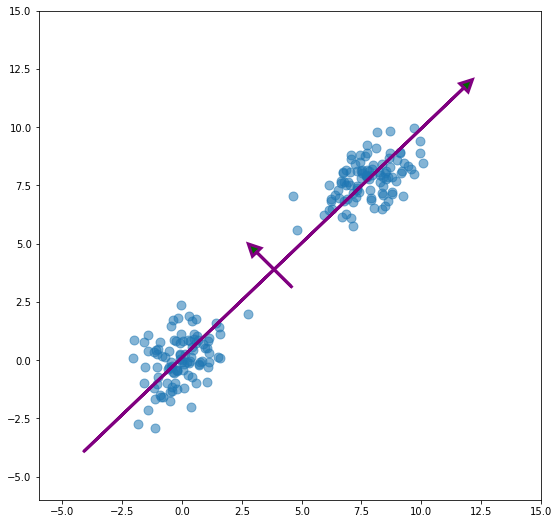

In [10]:
f, ax = plt.subplots(1, 1, figsize=(9, 9))

ax.scatter(ps[:, 0], ps[:, 1], s=80, alpha=.55)

for j in range(2):
    a = 2 * np.median(np.abs(W[:, j]))  # The scalar

    # Compting the "direction" as a function of the mean.
    p1 = mu - a * V[j]
    p2 = mu + a * V[j]
    
    dx, dy = p2 - p1
    ax.arrow(p1[0], p1[1], dx, dy, head_width=0.5, head_length=0.5, lw=3, 
             ec='purple', fc='darkgreen')

ax.set_xlim(-6, 15)
ax.set_ylim(-6, 15)

plt.show()

Now, instead of using the entire embedded space, let's just use one of the basis function and plot the reconstructed data.

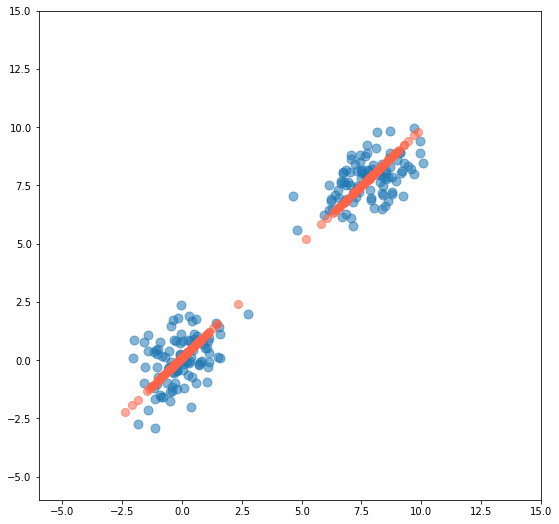

In [11]:
f, ax = plt.subplots(1, 1, figsize=(9, 9))

ax.scatter(ps[:, 0], ps[:, 1], s=80, alpha=.55)

# Reconstruction of the data from the latent-space representation

# With both dimensions - if you want to see that one again.
# Xhat = np.dot(W, V) + mu  # DON'T FORGET TO ADD THE MU

# Only one vector
Xhat = np.dot(W[:, 0].reshape(-1, 1), V[0, :].reshape(1, -1)) + mu  # DON'T FORGET TO ADD THE MU

ax.scatter(Xhat[:, 0], Xhat[:, 1], s=65, alpha=.55, color='tomato')

ax.set_xlim(-6, 15)
ax.set_ylim(-6, 15)

plt.show()

The plot above shows the points in the embedded space (red dots) in comparison to the real space (blue dots). We can see that the location in the embedded space is basically a projection on the basis fucntion (and it makes sense mathematically - can you tell why?).

### What is a good Embedded Space
Now the part that I promised you at the begining. In this embedded space, you can see that points are close to one antoher if and only if they were close to one another in the real world. That is a desirable property of an embedded space.

To show a bad example of an embedded let's look at using the other vector from V.

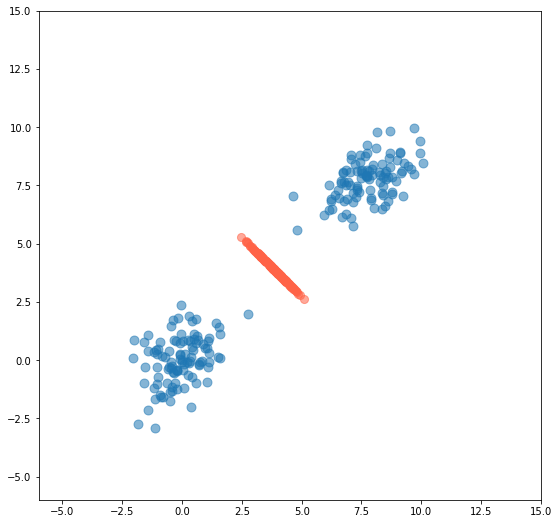

In [12]:
f, ax = plt.subplots(1, 1, figsize=(9, 9))

ax.scatter(ps[:, 0], ps[:, 1], s=80, alpha=.55)

# Reconstruction of the data from the latent-space representation

# With both dimensions - if you want to see that one again.
# Xhat = np.dot(W, V) + mu  # DON'T FORGET TO ADD THE MU

# Only one vector
Xhat = np.dot(W[:, 1].reshape(-1, 1), V[1, :].reshape(1, -1)) + mu  # DON'T FORGET TO ADD THE MU

ax.scatter(Xhat[:, 0], Xhat[:, 1], s=65, alpha=.55, color='tomato')

ax.set_xlim(-6, 15)
ax.set_ylim(-6, 15)

plt.show()

In this plot points that were far from each other are now close to one another.

## Faces Data Set

In the HW assignment you'll have to basically repeat what I've done with the 2D example using the Face data set. To help you with the assignment I'm going to do some of these things and explain what they mean.

In [14]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset

# Running the SVD using the exact same steps.

# Step 1
mu = np.mean(X, axis=0)
X0 = X - mu

# Step 2
U, s, V = svd(X0, full_matrices=False)

# Step 3
W = np.dot(U, np.diag(s))

print 'Shape of W = (%d, %d)' % W.shape, 'Shape of V = (%d, %d)' % V.shape

Shape of W = (4916, 576) Shape of V = (576, 576)


## V and W
The part where you have to show the "directions" learned I will keep to the HW assignment and instead just show you the W part -- using the code from the HW assignment.

In it, you are going to plot the faces as a function of their W values using only two dimensions (it's hard to plot 3d stuff and impossible to plot more than that).

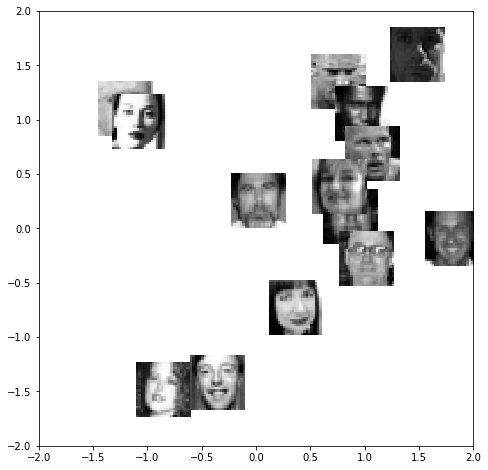

In [15]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))

idx = np.random.choice(X.shape[0], 15, replace=False)

coord, params = ml.transforms.rescale(W[:,0:2]) # normalize scale of "W" locations

for i in idx:
    loc = (coord[i, 0], coord[i, 0] + 0.5, coord[i,1], coord[i, 1] + 0.5) # where to place the image & size
    img = np.reshape(X[i,:], (24,24))
    ax.imshow(img.T , cmap="gray", extent=loc) # draw each image
    
ax.axis([-2, 2, -2, 2]) # set axis to reasonable visual scale
plt.show()

Hopefully you had a good random seed here and you got faces that are close to each other in the embedded space and are also similar image. If not, it is understandable. Our embedded space in this example is of 576 dimensions, this means that even if in the first 2 the images don't look alike, it is possible that adding the other dimensions will spread them apart. This is similar to the "bad example" in the geometric example. When we looked at the second direction points that should not have been close to each other were close tightly together, but clearly if we would have added the second dirction they will be farther apart.

### Measuring Information Loss

This concept can actually be quantified by measring how much information we are loosing when we use a small number of dimensions. In the HW assignment you are going to measure it with mean sequared error, and plot the error as a function of the number of "directions" used. 

This "loss" is also very visable when looking at the images themselves. Here are two examples.

The original images


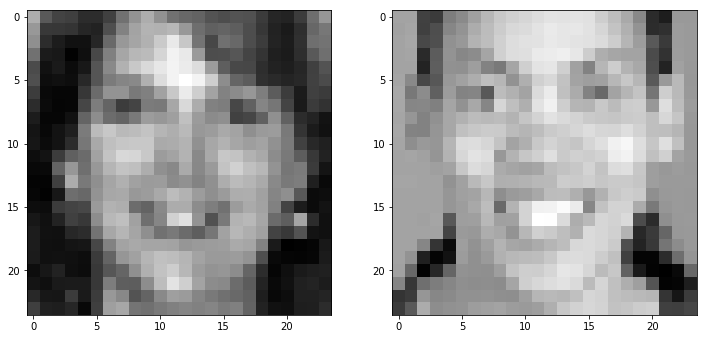

In [16]:
print 'The original images'
f, ax = plt.subplots(1, 2, figsize=(12, 15))

idx = [88, 14]
for j in range(len(idx)):
    i = idx[j]
    img = np.reshape(X[i,:],(24,24))  # reshape flattened data into a 24*24 patch
    
    # We've seen the imshow method in the previous discussion :)
    ax[j].imshow( img.T , cmap="gray")

plt.show()

Using only 2 dimensions


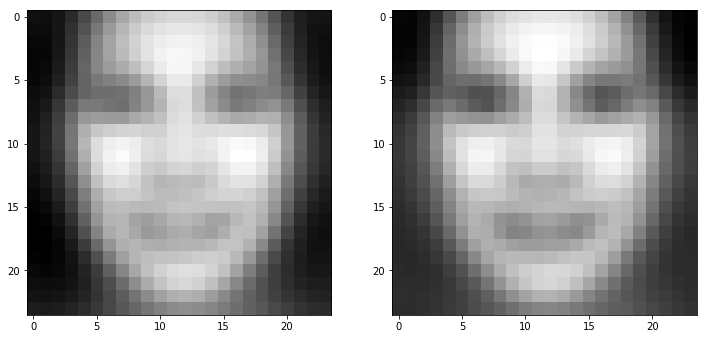

In [18]:
print('Using only 2 dimensions')

f, ax = plt.subplots(1, 2, figsize=(12, 15))

idx = [88, 14]
for j in range(len(idx)):
    i = idx[j]
    
    img = np.dot(W[i, :2], V[:2]) + mu  # DON'T FORGET TO ADD THE MU
    
    img = np.reshape(img,(24,24))  # reshape flattened data into a 24*24 patch
    
    # We've seen the imshow method in the previous discussion :)
    ax[j].imshow( img.T , cmap="gray")

plt.show()

Using only 50 dimensions


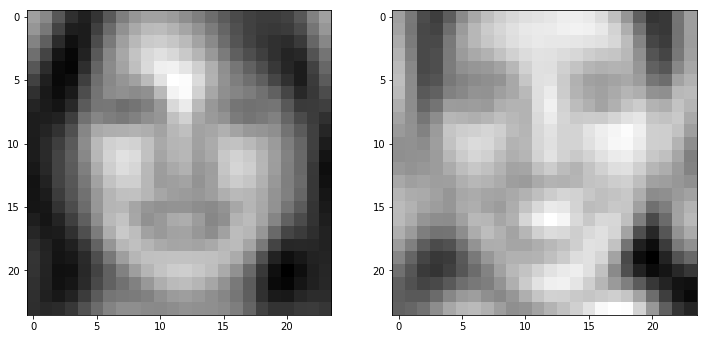

In [19]:
print('Using only 50 dimensions')

f, ax = plt.subplots(1, 2, figsize=(12, 15))

idx = [88, 14]
for j in range(len(idx)):
    i = idx[j]
    
    img = np.dot(W[i, :50], V[:50]) + mu  # DON'T FORGET TO ADD THE MU
    
    img = np.reshape(img,(24,24))  # reshape flattened data into a 24*24 patch
    
    # We've seen the imshow method in the previous discussion :)
    ax[j].imshow( img.T , cmap="gray")

plt.show()

Using 300 dimensions


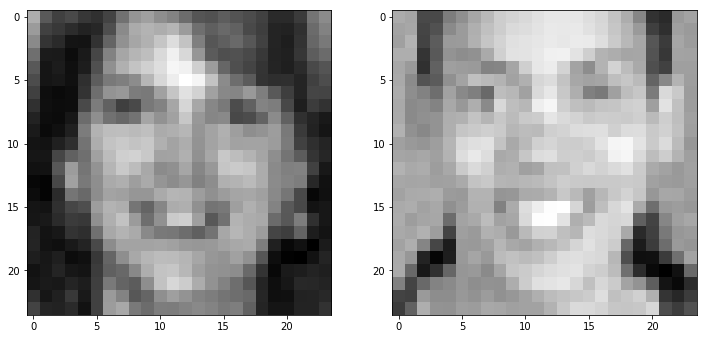

In [20]:
print('Using 300 dimensions')

f, ax = plt.subplots(1, 2, figsize=(12, 15))

idx = [88, 14]
for j in range(len(idx)):
    i = idx[j]
    
    img = np.dot(W[i, :300], V[:300]) + mu  # DON'T FORGET TO ADD THE MU
    
    img = np.reshape(img,(24,24))  # reshape flattened data into a 24*24 patch
    
    # We've seen the imshow method in the previous discussion :)
    ax[j].imshow( img.T , cmap="gray")

plt.show()

The more dimensions we use, the lower the loss is.

### Why use smaller K then?
If the highe K we use the less information we lose, then why use a small value for dimensions? As you said in the discussions, this value is related directly to complexity, both time and space.

I also showed you a different reason, that is related to the fact that we might want to generalize to unseen data. And to do that, let's look at the recommender systems example where I want my application to recommend <b>new</b> movies to users.

## Movie Dataset

To do that, we'll use a data set where each row is unique user and each column represent a unique movie. The element i,j in the matrix is 0 if the user didn't like the movie (rating of 3 and below) and 1 if she did (rating 4 and 5).

I've already prepared the data set for you. We have two files:

1. data.pkl: Sparse representation of the matrix described above.
2. movies_info.pkl: Dictionary from movie id (column id) to the name.

The suffix .pkl tells you that I pickled the data which is kind of like zipped the data for Python.

In [21]:
import pickle

# If python 2.x
sdata = pickle.load(open('./data/data.pkl', 'r'))
movies_info = pickle.load(open('./data/movies_info.pkl', 'r'))

# If python 3.x
# sdata = pickle.load(open('./data/data.pkl', 'r'), encoding='latin1')
# movies_info = pickle.load(open('./data/movies_info.pkl', 'r'),  encoding='latin1')

### SVD on the Movie Dataset
We are going to do the exact same thing only with one difference. We will run svds instead of svd. svds is a version of svd that is suitable for sparse data. It has one extra paramters -- k. 

In svd() we got all the dimensions and took only the first 2, here we are going to specify directly that we only one 2.

In [23]:
from scipy.sparse.linalg import svds

mu = sdata.mean(axis=0)
sdata = sdata - mu

U, s, V = svds(sdata, 2)
W = np.dot(U, np.diag(s))

print W.shape, V.shape

(943, 2) (2, 1674)


### Embedded Space

If the embedded space in the geometric example showed directions in the 2d, what would it mean in the movies? 

We can't really plot it, so let's just print the top and bottom 10 movies in each direction. This will give us a clue.

In [28]:
arg_sort_x = np.argsort(V[0])

print 'Top 10 on the X direction'
print '---------------------\n'
for i in arg_sort_x[:10]:
    print movies_info[i]
    
print '\n\n==================\n\n'
    
print 'Bottom 10 on the X direction'
print '---------------------\n'
for i in arg_sort_x[-10:]:
    print movies_info[i]    

Top 10 on the X direction
---------------------

Rock, The (1996)
Independence Day (ID4) (1996)
Ransom (1996)
Star Trek: First Contact (1996)
Twister (1996)
Mission: Impossible (1996)
Return of the Jedi (1983)
Phenomenon (1996)
Liar Liar (1997)
Speed (1994)




Bottom 10 on the X direction
---------------------

Rear Window (1954)
North by Northwest (1959)
Casablanca (1942)
Vertigo (1958)
Taxi Driver (1976)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
Chinatown (1974)
Graduate, The (1967)
Annie Hall (1977)
Citizen Kane (1941)


And the second dimension...

In [29]:
arg_sort_y = np.argsort(V[1])

print 'Top 10 on the Y direction'
print '---------------------\n'
for i in arg_sort_y[:10]:
    print movies_info[i]
    
print '\n\n==================\n\n'
    
print 'Bottom 10 on the Y direction'
print '---------------------\n'
for i in arg_sort_y[-10:]:
    print movies_info[i]    

Top 10 on the Y direction
---------------------

Air Force One (1997)
Seven Years in Tibet (1997)
Dante's Peak (1997)
I Know What You Did Last Summer (1997)
G.I. Jane (1997)
Rosewood (1997)
Cop Land (1997)
Mother (1996)
Thousand Acres, A (1997)
Peacemaker, The (1997)




Bottom 10 on the Y direction
---------------------

Princess Bride, The (1987)
Forrest Gump (1994)
Shawshank Redemption, The (1994)
Monty Python and the Holy Grail (1974)
Fugitive, The (1993)
Back to the Future (1985)
Pulp Fiction (1994)
Empire Strikes Back, The (1980)
Silence of the Lambs, The (1991)
Raiders of the Lost Ark (1981)


We can see that each direction captures a featur of the movies. In this example, when using only 2 dimensions the X direction captures the release date where old movies are in the bottom 10 and new movies are on the top 10. 

The Y direction is more open to interpertation, I think (and that's what I also said in class) that it captures quality, where one side of the direction shows quality movies while the other one shows movies that are not really highly rated. 

### Question: So if we'll not plot the projection of W on this space, what will we get??? What is each dot? What will the location indicate? What can it be used for?

In the W matrix, each row will not represent a user, and each element in that row is now the preference for the specific feature (new or old, quality or shitty movies). This can be used for profiling the users (and the movies too, because we now know where they are on each direction) and we recommend now movies that the user haven't watched but will probably like.

### Another meaning for K
If in the 2d and the faces example choosing the value of K was a balance between information loss and complexity, here we have a new thing. It is called generalizing beyond seen data. 

This is an important concept in recommender systems as we want to recommend new movies (or other items) to the user and not the ones she already watched. 

When having a large value of K, we get perfect recontruction of the seen data, which will get us no recommendation toward new movies. Using low 